In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
isDragging = False                        # 마우스 드래그 상태 저장 
x0, y0, w, h = -1,-1,-1,-1                # 영역 선택 좌표 저장
blue, red = (255,0,0),(0,0,255)           # 색상 값 

def onMouse(event,x,y,flags,param):       # 마우스 이벤트 핸들 함수  ---①
    global isDragging, x0, y0, w, h, img        # 전역변수 참조
    if event == cv2.EVENT_LBUTTONDOWN:    # 왼쪽 마우스 버튼 다운, 드래그 시작 ---②
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:    # 마우스 움직임 ---③
        if isDragging:                    # 드래그 진행 중
            img_draw = img.copy()         # 사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # 드래그 진행 영역 표시
            cv2.imshow('img', img_draw)    # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONUP:    # 왼쪽 마우스 버튼 업 ---④
        if isDragging:                     # 드래그 중지
            isDragging = False          
            w = x - x0                    # 드래그 영역 폭 계산
            h = y - y0                    # 드래그 영역 높이 계산
            print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            
            if w > 0 and h > 0:          # 폭과 높이가 양수이면 드래그 방향이 옳음 ---⑤
                img_draw = img.copy()     # 선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역에 빨간 사각형 표시
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2) 
                cv2.imshow('img', img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                #roi = img[y0:y0+h, x0:x0+w] # 원본 이미지에서 선택 영영만 ROI로 지정 ---⑥
                #cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
                #cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
                #cv2.imwrite('./cropped.jpg', roi)   # ROI 영역만 파일로 저장 ---⑦
                #print("croped.")
            else:
                cv2.imshow('img', img)  # 드래그 방향이 잘못된 경우 사각형 그림이 없는 원본 이미지 출력
                print("좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")

img = cv2.imread(r'C:\Users\silvi\Leica\input_image\coarsecheck.png')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) # 마우스 이벤트 등록 ---⑧
cv2.waitKey()
cv2.destroyAllWindows()

x:392, y:351, w:89, h:118


In [12]:
print(x0)
print(y0)
print(w)
print(h)

392
351
89
118


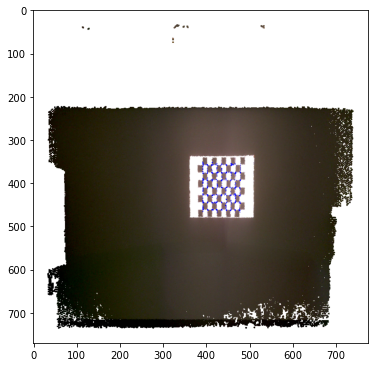

In [13]:
x = x0
y = y0

#img_draw = img.copy()
roi = img[y:y+h, x:x+w]     #원하는 구간만 이미지 지정
#cv2.imshow('cropped', roi) #크롭한 구간 보여주기
#cv2.waitKey()              #키 누를때까지 대기
#cv2.destroyAllWindows()    #키 누르면 종료

#해리스 코너 디텍트
roi_gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
roi_gray = np.float32(roi_gray)
dst = cv2.cornerHarris(roi_gray,2,3,0.04)
roi[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(6,8))
plt.imshow(img)

cv2.imshow('dst',img)
cv2.imwrite('./croped.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

##  3D 컴퓨터 비전 과제로 해리스

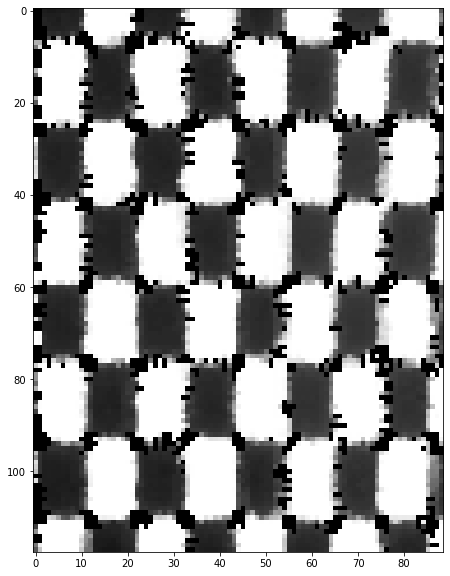

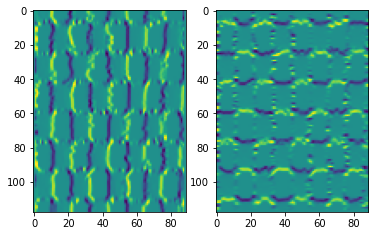

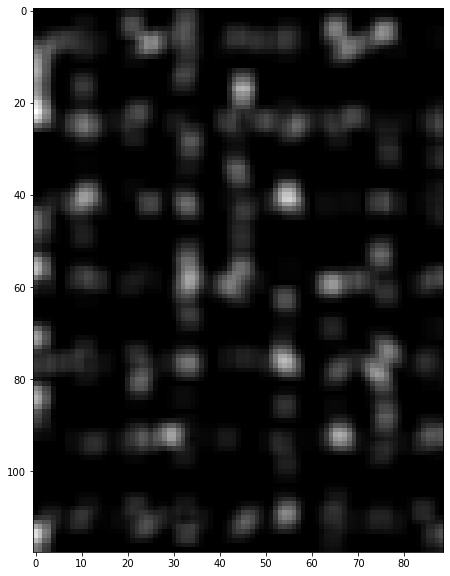

x:34,y:3
x:35,y:3
x:33,y:4
x:65,y:4
x:66,y:4
x:77,y:4
x:32,y:5
x:33,y:5
x:75,y:5
x:76,y:5
x:77,y:5
x:78,y:5
x:32,y:6
x:33,y:6
x:34,y:6
x:35,y:6
x:45,y:6
x:54,y:6
x:55,y:6
x:56,y:6
x:57,y:6
x:75,y:6
x:76,y:6
x:77,y:6
x:78,y:6
x:79,y:6
x:6,y:7
x:7,y:7
x:8,y:7
x:9,y:7
x:10,y:7
x:14,y:7
x:15,y:7
x:16,y:7
x:24,y:7
x:26,y:7
x:27,y:7
x:28,y:7
x:32,y:7
x:33,y:7
x:34,y:7
x:35,y:7
x:36,y:7
x:45,y:7
x:48,y:7
x:49,y:7
x:54,y:7
x:55,y:7
x:56,y:7
x:57,y:7
x:58,y:7
x:59,y:7
x:70,y:7
x:71,y:7
x:74,y:7
x:75,y:7
x:76,y:7
x:77,y:7
x:78,y:7
x:79,y:7
x:3,y:8
x:4,y:8
x:5,y:8
x:6,y:8
x:7,y:8
x:8,y:8
x:9,y:8
x:10,y:8
x:11,y:8
x:12,y:8
x:13,y:8
x:14,y:8
x:15,y:8
x:16,y:8
x:24,y:8
x:25,y:8
x:26,y:8
x:27,y:8
x:28,y:8
x:32,y:8
x:33,y:8
x:34,y:8
x:36,y:8
x:48,y:8
x:49,y:8
x:54,y:8
x:55,y:8
x:56,y:8
x:57,y:8
x:58,y:8
x:59,y:8
x:67,y:8
x:68,y:8
x:69,y:8
x:70,y:8
x:71,y:8
x:72,y:8
x:73,y:8
x:74,y:8
x:75,y:8
x:76,y:8
x:77,y:8
x:78,y:8
x:79,y:8
x:80,y:8
x:3,y:9
x:4,y:9
x:5,y:9
x:6,y:9
x:9,y:9
x:11,y:9
x:12,y:9
x:13,y:9

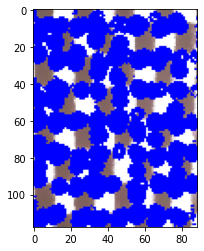

In [14]:
''' Load image using OpenCV '''

x = x0
y = y0

img_bgr = img[y:y+h, x:x+w] 

#img_bgr = cv2.imread("maskimage.png")

# Normalize image to between 0 and 1.
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY).astype(float) / 255.0

# Show output
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.show()


# In[3]:


# Perform Sobel filtering along the x-axis.
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Ix = cv2.filter2D(img, -1, sobel_x)
# Perform Sobel filtering along the y-axis.
''' DO IT YOURSELF for sobel_y and Iy '''
sobel_y = sobel_x.T
ly = cv2.filter2D(img, -1, sobel_y)

plt.subplot(1,2,1)
plt.imshow(Ix)
plt.subplot(1,2,2)
plt.imshow(ly)


# In[4]:


''' Approximate local error surface '''
window_size = 3
offset = int(np.floor(window_size/2))

det = np.zeros(img.shape)
trace = np.zeros(img.shape) 
matrix_R = np.zeros(img.shape)

# For each pixel in image
for y in range(offset, img.shape[0]-offset):
  for x in range(offset, img.shape[1]-offset):
    
    # Build ROI window around the current pixel
    # Note numpy uses height-by-width convention (row x column)
    window_x = Ix[y-offset:y+offset+1, x-offset:x+offset+1]
    ''' DO IT YOURSELF for window_y '''
    window_y = ly[y-offset:y+offset+1, x-offset:x+offset+1]
    
    # Estimate elements of matrix M.
    Sxx = np.sum(window_x * window_x)
    #print(Sxx)
    ''' DO IT YOURSELF for Syy and Sxy '''
    Syy = np.sum(window_y * window_y)
    #print(Syy)
    Sxy = np.sum(window_y * window_x)
    #print(Sxy)
    # Compute determinant of M and trace of M.
    # Note numpy uses height-by-width convention (row x column)
    trace[y,x] = Sxx + Syy
    ''' DO IT YOURSELF for det[y,x] '''
    det[y,x] = (Sxx * Syy) - (Sxy**2)   


# In[5]:


# Set hyperparameters
alpha = 0.05
beta = 0.1

# Compute response map
''' DO IT YOURSELF!: R = det(M) - alpha * trace(M)^2 '''
R = det - alpha * (trace**2)

# Use thresholding to discard responses with low amplitude
''' DO IT YOURSELF! R is discarded if R < beta * max(R) '''
maxR = np.max(R)

for i in range(0, R.shape[0]):
    for j in range(0, R.shape[1]):
        if R[i,j] < beta * maxR:
            R[i,j] = 0
            
''' DO IT YOURSELF! Define gaussian_2d kernel as a numpy array. '''
gaussian_1d = cv2.getGaussianKernel(5,3)
gaussian_2d = np.outer(gaussian_1d, gaussian_1d.transpose())

R = cv2.filter2D(R, -1, gaussian_2d)
# Show the response map
plt.figure(figsize=(10, 10))
plt.imshow(R, cmap='gray')
plt.show()


# In[6]:


# Set NMS window size
window_size = 3
offset = int(np.floor(window_size/2))
output_img = np.zeros(img.shape) 

# For each pixel, perform non-maximal suppressi
for y in range(offset, img.shape[0]-offset):
  for x in range(offset, img.shape[1]-offset):
    
    if R[y,x] == 0.0:
      # If the response map value is 0, then we can skip
      continue

    center_value = R[y,x]
    ''' DO IT YOURSELF! get max_value of the 3x3 block ''' 
    block_3x3 = R[y:y+window_size,x:x+window_size]
    max_value = np.amax(block_3x3)
    
    # If the center value is not the same as the maximum value of the 3x3 block, 
    # then it's not maximum, so suppress.
    # Otherwise, let the pixel survive.
    if center_value != max_value:
        ''' DO IT YOURSELF for output_img[y,x] '''
        # suppress
        output_img[y,x] = 0
    
    else:
        ''' DO IT YOURSELF for output_img[y,x] '''
        output_img[y,x] = 1.0


# In[7]:


''' Extract feature points and draw on the image '''
y, x = np.where(output_img==1.0)

for i in range(0, len(x)):
    output_vis = cv2.circle(img_bgr, (x[i], y[i]), 3, (0, 0, 255))
    print('x:%d,y:%d' % (x[i],y[i]))

plt.imshow(output_vis, cmap='gray')
plt.show()